## yfinance_5_0～5_3 のデータ df_0～3 を統合

3000時点以上の株価時系列を4つ(df_1～4)に分けて抽出　→　1つ(df)に統合

2730社 × 2614時点

しかしながら、株価の中に負の値を持つものや大きく外れた値があり、標準化が難しい

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ライブラリの読み込み
import pandas as pd
import numpy as np

In [3]:
df_0 = pd.read_csv('/content/drive/MyDrive/data/code/df_0.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/data/code/df_1.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/data/code/df_2.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/data/code/df_3.csv')

In [4]:
df_merge = pd.merge(df_0, df_1, on='timestamp', how='inner')
df_merge = pd.merge(df_merge, df_2, on='timestamp', how='inner')
df_merge = pd.merge(df_merge, df_3, on='timestamp', how='inner')

In [5]:
df_merge.iloc[:,1:]

1301        1332         1376         1377         1379  \
0     1387.560669  215.256714   587.403748   972.724060  1346.330444   
1     1411.078735  215.256714   583.466858   987.756958  1341.309326   
2     1387.560669  212.753693   599.214905   973.608337  1339.157471   
3     1411.078735  213.588028   621.262146   969.187012  1353.503052   
4     1434.596680  221.931335   640.159912  1015.170471  1362.110596   
...           ...         ...          ...          ...          ...   
2609  2946.767090  527.525635  1434.834351  3274.262207  1813.212769   
2610  2956.508545  521.696655  1439.782104  3259.356689  1807.395020   
2611  3014.956787  533.354614  1447.698364  3323.947510  1831.635864   
2612  3019.827393  533.354614  1484.311401  3353.758789  1856.846313   
2613  3000.344727  527.525635  1488.269531  3264.325195  1850.058838   

             1380         1381         1382        1400         1407  ...  \
0      371.314667   557.916138  1268.558105   62.200001   105.233070  ...   
1      387.940704   558.746399  1277.799072   58.500000   102.351852  ...   
2      392.559052   572.860352  1279.479370   60.500000   100.293846  ...   
3      377.780334   569.539429  1302.162231   62.000000   102.077438  ...   
4      390.711731   576.181274  1318.964355   58.299999   104.272675  ...   
...           ...          ...          ...         ...          ...  ...   
2609  1070.190674  3062.243408   941.113647  199.000000  5717.459961  ...   
2610  1061.272461  3067.104248   946.087830  195.000000  5539.715332  ...   
2611  1063.254272  3062.243408   954.046509  190.000000  5687.835938  ...   
2612  1063.254272  3110.850586   946.087830  190.000000  5697.710449  ...   
2613  1064.245239  3149.736084   926.191101  192.000000  5658.211914  ...   

             9986         9987         9989        9990        9991  \
0      311.364746  1984.083374   953.748718  164.294724  229.732224   
1      310.101532  1895.243652   960.372070  167.263901  223.105316   
2      318.943573  1895.243652   969.893005  167.758743  225.314301   
3      320.838287  1883.094360   980.241943  166.769043  222.369034   
4      321.469818  1873.223267   970.306763  178.150909  231.941147   
...           ...          ...          ...         ...         ...   
2609  1927.043823  3242.854492  2897.008789  496.145355  758.429932   
2610  1838.840942  3198.767578  2871.681885  493.232544  770.878906   
2611  1864.726562  3257.550293  2914.542725  499.058136  778.539795   
2612  1888.694702  3301.637451  2941.817871  503.912781  790.031128   
2613  1908.828003  3252.651855  2927.206299  502.941864  790.031128   

             9993         9994        9995         9996        9997  
0      943.149353   550.023743  182.761322   686.035095  170.805588  
1      952.765076   550.023743  192.458893   646.079163  176.252701  
2      935.136108   555.969971  191.712921   643.817444  171.972794  
3      935.937439   550.767029  193.950836   631.755310  175.474533  
4      935.136108   567.119080  220.059616   662.664551  194.539429  
...           ...          ...         ...          ...         ...  
2609  1591.141357  2356.358643  391.011383  1483.459229  660.437073  
2610  1579.355103  2373.994629  391.984039  1445.371826  655.573792  
2611  1581.319458  2388.691162  396.847382  1431.699341  668.218384  
2612  1582.301514  2397.509277  400.738037  1451.231445  694.480225  
2613  1597.034424  2397.509277  398.792694  1453.184448  689.616882  

[2614 rows x 2730 columns]

In [6]:
# index:timestamp を削除 
df = df_merge.iloc[:,1:]

In [7]:
# 値がバグってる？
# df = df.drop(columns='2492')
# print(df.min().min(), df.max().max())

In [8]:
# 列（会社）ごとに標準化

for i in range(df.shape[1]):
  df.iloc[:,i] = (df.iloc[:,i] - df.iloc[:,i].values.mean()) / df.iloc[:,i].values.std()

In [13]:
df.index.name = 'timestamp'

In [14]:
df

1301      1332      1376      1377      1379      1380  \
timestamp                                                               
0         -1.929793 -1.166129 -1.472245 -1.395406 -1.299975 -0.955582   
1         -1.886308 -1.166129 -1.483748 -1.381469 -1.321219 -0.891461   
2         -1.929793 -1.181335 -1.437733 -1.394586 -1.330324 -0.873649   
3         -1.886308 -1.176266 -1.373312 -1.398685 -1.269627 -0.930646   
4         -1.842823 -1.125579 -1.318093 -1.356054 -1.233208 -0.880774   
...             ...       ...       ...       ...       ...       ...   
2609       0.953197  0.730958  1.003915  0.738378  0.675435  1.739757   
2610       0.971209  0.695546  1.018372  0.724559  0.650819  1.705362   
2611       1.079280  0.766371  1.041503  0.784442  0.753384  1.713005   
2612       1.088286  0.766371  1.148485  0.812081  0.860051  1.713005   
2613       1.052263  0.730958  1.160051  0.729166  0.831333  1.716827   

               1381      1382      1400      1407  ...      9986      9987  \
timestamp                                          ...                       
0         -1.280604  1.545103 -1.161500 -0.662630  ... -2.121474 -1.301561   
1         -1.279824  1.600558 -1.186125 -0.664935  ... -2.125171 -1.381459   
2         -1.266557  1.610641 -1.172814 -0.666581  ... -2.099293 -1.381459   
3         -1.269679  1.746760 -1.162831 -0.665154  ... -2.093748 -1.392385   
4         -1.263436  1.847589 -1.187456 -0.663399  ... -2.091900 -1.401263   
...             ...       ...       ...       ...  ...       ...       ...   
2609       1.073387 -0.419872 -0.251039  3.825650  ...  2.607057 -0.169495   
2610       1.077956 -0.390023 -0.277661  3.683502  ...  2.348918 -0.209144   
2611       1.073387 -0.342263 -0.310938  3.801959  ...  2.424676 -0.156278   
2612       1.119076 -0.390023 -0.310938  3.809856  ...  2.494822 -0.116629   
2613       1.155627 -0.509422 -0.297627  3.778267  ...  2.553745 -0.160684   

               9989      9990      9991      9993      9994      9995  \
timestamp                                                               
0         -1.760351 -1.848200 -2.038364 -2.685972 -2.007265 -1.667914   
1         -1.754270 -1.840409 -2.062697 -2.637264 -2.007265 -1.592200   
2         -1.745528 -1.839110 -2.054586 -2.726563 -1.997433 -1.598024   
3         -1.736027 -1.841707 -2.065401 -2.722504 -2.006036 -1.580551   
4         -1.745148 -1.811839 -2.030253 -2.726563 -1.978997 -1.376705   
...             ...       ...       ...       ...       ...       ...   
2609       0.023820 -0.977352 -0.097014  0.596424  0.979515 -0.041984   
2610       0.000567 -0.984996 -0.051302  0.536721  1.008676 -0.034390   
2611       0.039919 -0.969708 -0.023171  0.546671  1.032977  0.003581   
2612       0.064961 -0.956968  0.019024  0.551646  1.047558  0.033957   
2613       0.051545 -0.959516  0.019024  0.626275  1.047558  0.018769   

               9996      9997  
timestamp                      
0         -1.173423 -1.517560  
1         -1.290645 -1.500053  
2         -1.297280 -1.513808  
3         -1.332668 -1.502554  
4         -1.241987 -1.441279  
...             ...       ...  
2609       1.166047  0.056112  
2610       1.054307  0.040482  
2611       1.014195  0.081121  
2612       1.071498  0.165527  
2613       1.077228  0.149896  

[2614 rows x 2730 columns]

In [10]:
df.to_csv("df_0123.csv")

from google.colab import files
files.download('df.csv')

KeyboardInterrupt: ignored

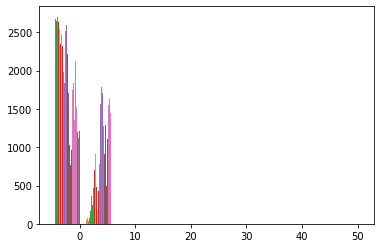

In [9]:
#import matplotlib.pyplot as plt
#plt.hist(df)
#plt.show()